# Lab 5, Maria Chernyavskaya, Section AB

In [20]:
! conda install pyuvdata -y > /dev/null



==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base conda




In [2]:
# import pyuvdata everytime for JupyterHub
from pyuvdata import UVData
import numpy as np
from matplotlib import pyplot as plt
import scipy
from scipy import stats
plt.rcParams["figure.figsize"] = (10,6)

In [3]:
uv = UVData()
uv.read('/home/jovyan/Phys434_BigData/hera_data', file_type = 'uvh5')
data = uv.data_array
print('This data array has shape:')
print(f'{np.shape(data[0])} baselines*times, {np.shape(data)[1]} spectral windows, {np.shape(data)[2]} frequencies, {np.shape(data)[3]} polarizations')

This data array has shape:
(1, 1536, 1) baselines*times, 1 spectral windows, 1536 frequencies, 1 polarizations


In [16]:
# Look at the antennas that are contained in the array:
print(sorted(uv.antenna_numbers))
# Pick 2 sample antennas, and get data from that baseline. Note that to get the 'auto-correlations', you can do the 
# same thing, but set antenna1 and antenna2 to be the same value.
antenna1 = 140
antenna2 = 23
data = uv.get_data(antenna1,antenna2)

[0, 1, 2, 11, 12, 13, 14, 23, 24, 25, 26, 36, 37, 38, 39, 44, 45, 46, 50, 51, 52, 53, 58, 59, 65, 66, 67, 68, 73, 75, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 98, 99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 116, 117, 118, 119, 120, 121, 122, 123, 124, 127, 128, 129, 130, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165, 166, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


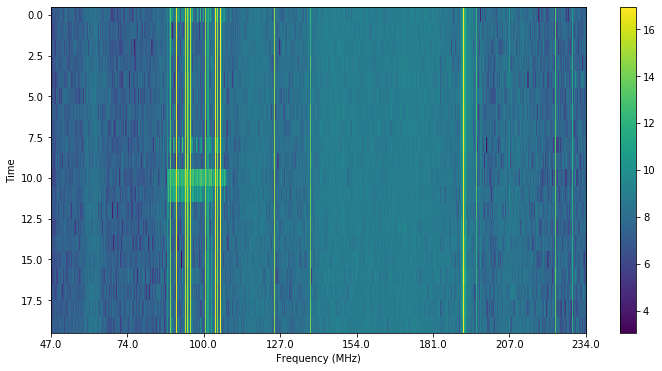

In [17]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.log(np.abs(data)),aspect='auto')
cbar = fig.colorbar(im)
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)

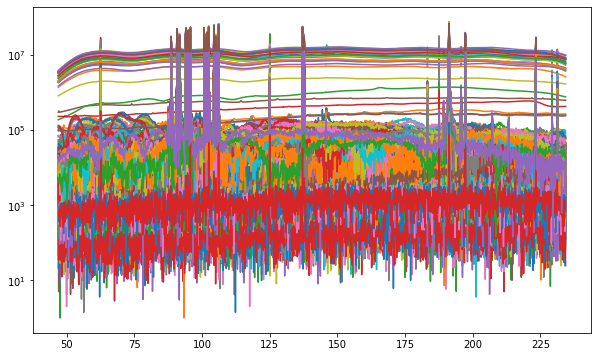

In [19]:
pairs = uv.get_antpairs()
pairs[0][1]
for i in range(666):
    ant1 = pairs[i][0]
    ant2 = pairs[i][1]
    dat = abs(uv.get_data(ant1, ant2))
    plt.yscale('log')
    plt.plot(freqs, dat[19])

Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part


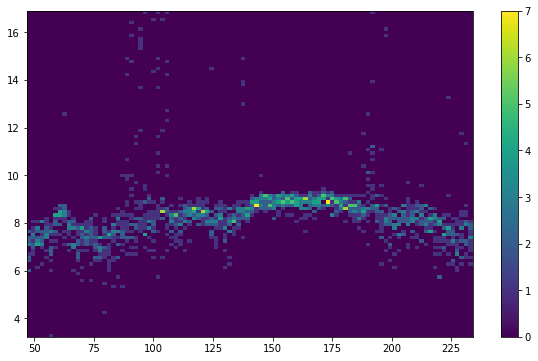

In [7]:
for i in range(20):
    plt.hist2d(freqs,np.log(data[i]), bins = 100)
plt.colorbar()
plt.show()

Non-sky phenomenon: not background noise, it's contamination (someone on Earth is doing funny things with a radio)

Polution from radio

Autocorrelation tells us if antennae are broken.

In [10]:
# Look at the antennas that are contained in the array:
print(sorted(uv.antenna_numbers))
# Pick 2 sample antennas, and get data from that baseline. Note that to get the 'auto-correlations', you can do the 
# same thing, but set antenna1 and antenna2 to be the same value.
antenna1 = 140
antenna2 = 23
data = uv.get_data(antenna1,antenna1)

[0, 1, 2, 11, 12, 13, 14, 23, 24, 25, 26, 36, 37, 38, 39, 44, 45, 46, 50, 51, 52, 53, 58, 59, 65, 66, 67, 68, 73, 75, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 98, 99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 116, 117, 118, 119, 120, 121, 122, 123, 124, 127, 128, 129, 130, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165, 166, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


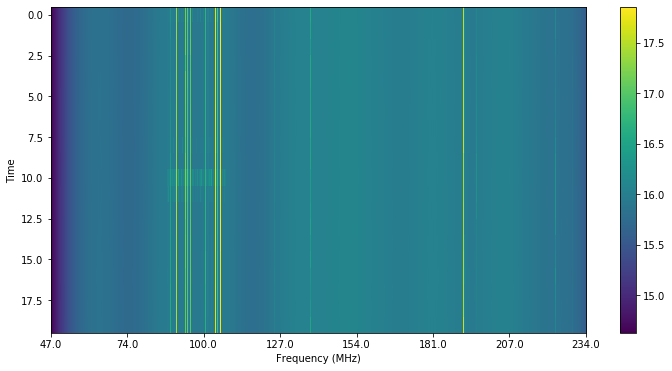

In [12]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.log(np.abs(data)),aspect='auto')
cbar = fig.colorbar(im)
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)

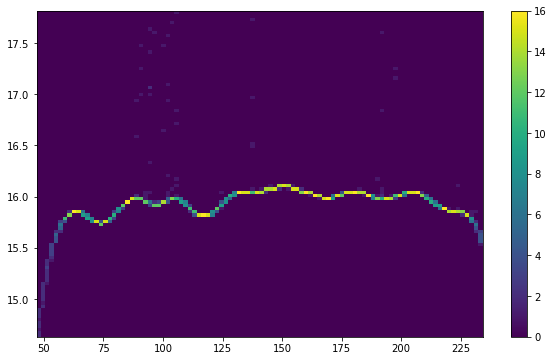

In [13]:
for i in range(20):
    plt.hist2d(freqs,np.log(data[i]), bins = 100)
plt.colorbar()
plt.show()

This is the first of a 4 lab sequence working with more realistic data.

You have two choices of the data to work with, and the data and suggestions of how to look at them are detailed in these documents: HERA radio telescope data, or LHC particle physics data. The first decision you need to make is which 'family' of data you and your lab partner will work on.

Once you have decided on the data family, Please go to this page to download your data. In either case, you and your lab partner will be looking at independent data sets, but both from the same 'family'. There are three examples of HERA data to choose from, and two of the LHC data.

Lab 5 Instructions
Getting started (don't turn in, but think)

Pick and download your data
Get familiar with your data, making sure you understand the axes, etc.
Following the links in the data instructions, read about your instrument and how the data was taken
Explore your data. Mostly make sure you understand what all of the labels mean, and make a few representative plots.
For your lab report, create an initial writeup of your data and what you found. Think of this as a book report, where you describe how the data was taken, what the labels mean, and how to interpret the first plots you've made. This will need to be several pages long.